In [1]:
import pandas as pd
import numpy as np
import random


In [2]:

def generate_demand(od_data):
    """
    randomly generate agent with weighted sampling
    """

    # Step 1: Calculate the total demand from the original dataset
    total_demand = od_data['Ton'].sum()

    # Step 2: Create dictionaries with the total demand from each origin and destination
    origin_demand = od_data.groupby('O')['Ton'].sum().to_dict()
    destination_demand = od_data.groupby('D')['Ton'].sum().to_dict()

    # Normalize the demands to get probabilities
    total_origin_demand = sum(origin_demand.values())
    total_destination_demand = sum(destination_demand.values())

    assert total_origin_demand == total_destination_demand

    origin_probabilities = {o: d / total_origin_demand for o, d in origin_demand.items()}
    destination_probabilities = {d: dmd / total_destination_demand for d, dmd in destination_demand.items()}
    

    # Step 3: Generate a new dataset
    new_data = []

    for _ in range(int(total_demand)):
        # Select origin based on weighted probability
        origin = np.random.choice(list(origin_probabilities.keys()), p=list(origin_probabilities.values()))
        
        # Select destination - 70% chance to be either 21, 22, 23, 24
        if random.random() < 0.7:
            destination = random.choice([21, 22, 23, 24])
        else:
            destination = np.random.choice(list(destination_probabilities.keys()), p=list(destination_probabilities.values()))
        
        # Assuming each entry in the new dataset has a demand of 1 to match the total demand
        new_data.append([origin, destination, 1])

    # Convert the new data into a DataFrame
    new_od_data = pd.DataFrame(new_data, columns=['O', 'D', 'Ton'])

    # Aggregate the demand for the same origin to destination pairs
    aggregated_od_data = new_od_data.groupby(['O', 'D']).count().reset_index()
    return aggregated_od_data





In [3]:
# Load the uploaded OD demand file
dataset = "SiouxFalls"
od_data = pd.read_csv("../data/{}/{}_od.csv".format(dataset, dataset))

od_df = generate_demand(od_data)

In [4]:
od_df

,O,D,Ton
0,1,1,52
1,1,2,29
2,1,3,25
3,1,4,76
4,1,5,47
...,...,...,...
571,24,20,110
572,24,21,1414
573,24,22,1578
574,24,23,1482


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_od_heatmap(df, value_column, title, cmap='Reds', save_path=None, figsize=(10, 8), annot=False):
    """
    This function plots and saves a heatmap for an OD matrix.

    Parameters:
    - df: DataFrame containing the OD data.
    - value_column: The name of the column in df that contains the values to plot.
    - title: Title for the heatmap.
    - cmap: Colormap to be used for heatmap.
    - save_path: Path to save the figure (including the filename).
    - figsize: Size of the figure.
    - annot: If True, the values will be shown on the heatmap.
    """
    # Pivot the table to get a matrix where index is 'O', columns are 'D', and cell values are the specified 'value_column'
    od_matrix_pivot = df.pivot(index='O', columns='D', values=value_column).fillna(0)

    # Plotting the heatmap
    plt.figure(figsize=figsize)
    heatmap = sns.heatmap(od_matrix_pivot, cmap=cmap, linewidths=.5, annot=annot)
    plt.title(title)
    plt.xlabel('Destination Node ID')
    plt.ylabel('Origin Node ID')

    # If a save path is provided, save the figure
    if save_path:
        plt.savefig(save_path)

    # Show the heatmap
    plt.show()

# Example usage:
# Assuming od_df is a DataFrame with the OD data and 'Ton' column as values.
# plot_od_heatmap(od_df, 'Ton', 'OD Matrix Heatmap', save_path='/mnt/data/od_matrix_heatmap.pdf')


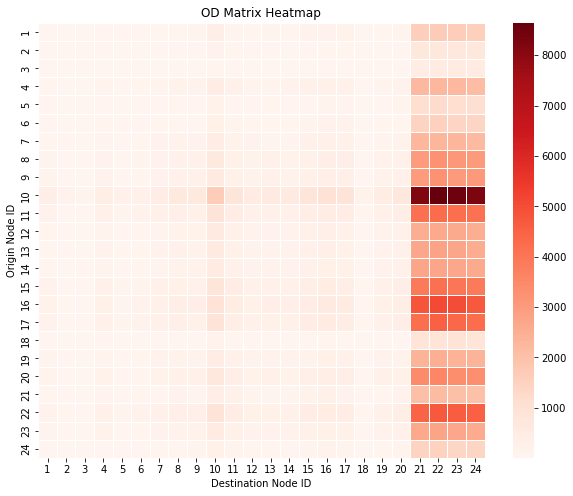

In [6]:
plot_od_heatmap(od_df, 'Ton', 'OD Matrix Heatmap', save_path='../figures/od_matrix_heatmap.pdf', annot=False)


In [7]:
od_df.to_csv("../data/SiouxFalls/SiouxFalls_od_dist2.csv", index=False)